# Breast-Cancer KNN Classifier Approach

In [ ]:
# sklearn: ML Library
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# (1) Examining the Dataset

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

In [ ]:
X = cancer.data # features
y = cancer.target # target

# (2) Selecting the Machine Learning Model - KNN Classifier

# (3) Training the Model

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# create and train knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # fit function trains the knn algorithm using our data (samples + target)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# (4) Evaluating the Results: test
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9590643274853801


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion_matrix:")
print(conf_matrix)

confusion_matrix:
[[ 59   4]
 [  3 105]]


In [ ]:
# (5) Hyperparameter Tuning
"""
    KNN: Hyperparameter = K
        K: 1,2,3 ... N
        Accuracy: %A, %B, %C ....
"""
accuracy_values = []
k_values = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

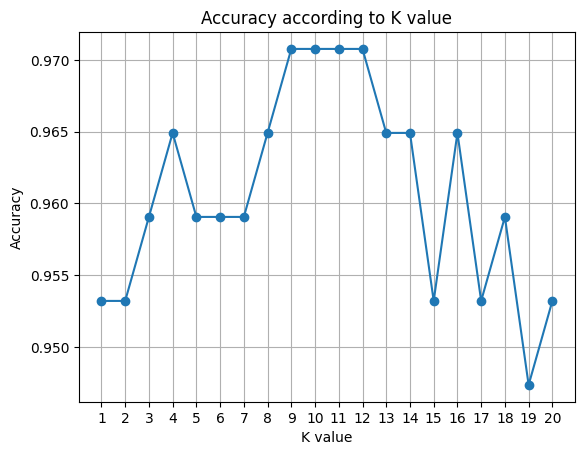

In [ ]:
plt.figure()
plt.plot(k_values, accuracy_values, marker = "o", linestyle = "-")
plt.title("Accuracy according to K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)

In [ ]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
X = np.sort(5 * np.random.rand(40, 1), axis = 0) # features
y = np.sin(X).ravel() # target

# plt.scatter(X, y)

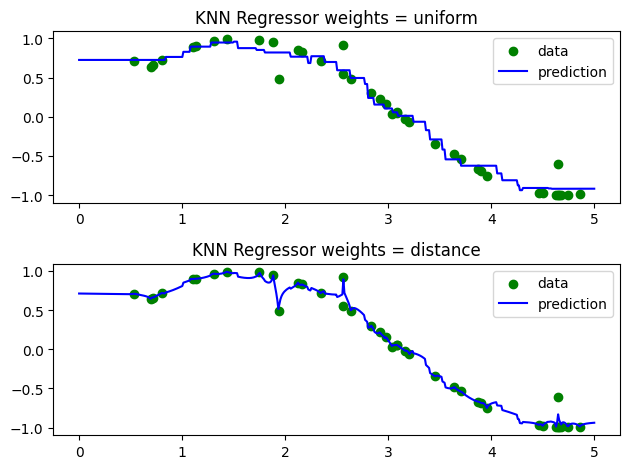

In [ ]:
# add noise
y[::5] += 1 * (0.5 - np.random.rand(8))

# plt.scatter(X, y)
T = np.linspace(0, 5, 500)[:, np.newaxis]

for i, weight in enumerate(["uniform", "distance"]):

    knn = KNeighborsRegressor(n_neighbors=5, weights=weight)
    y_pred = knn.fit(X,y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color = "green", label = "data")
    plt.plot(T, y_pred, color = "blue", label = "prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNN Regressor weights = {}".format(weight))

plt.tight_layout()
plt.show()